In [2]:
#How vectors transform under coordinate rotations?

from sympy import symbols, cos, sin, simplify, separatevars
x,y,i,j=symbols('x y i j')
A_x, A_y=symbols('A_x A_y')
A=A_x * i + A_y * j
print("The vector A is:", A)

u,v,k,l=symbols('u v k l')
B_u, B_v=symbols('B_u B_v')
theta=symbols('theta')


B=B_u * k + B_v*l
print("The vector B is:", B)

B=B.subs(k,i * cos(theta) - j * sin(theta))
print("The form that B takes after replacing one unit vector", B)
B=B.subs(l,i * sin(theta) + j * cos(theta))
print("B in the old basis is:",B)


The vector A is: A_x*i + A_y*j
The vector B is: B_u*k + B_v*l
The form that B takes after replacing one unit vector B_u*(i*cos(theta) - j*sin(theta)) + B_v*l
B in the old basis is: B_u*(i*cos(theta) - j*sin(theta)) + B_v*(i*sin(theta) + j*cos(theta))


In [3]:
####################################
#We would now like to compute the new vector components in terms of the old
#Remember the vectors A and B are the same. Only their representation in the 
#two sets of basis is different

from sympy import Eq, solve

print("In order to find the B_u and B_v in terms of A_x and A_y, we need to set the two vectors equal to eaach other")
print("This means we need to separate terms linear in i and j in B")
B_i=separatevars(B).coeff(i)
B_j=separatevars(B).coeff(j)
print("B_i=", B_i)
print("B_j=", B_j)

#Now define system of equations
eq1=Eq(B_i,A_x)
eq2=Eq(B_j,A_y)
system_of_eqns=[eq1,eq2]
solution=solve(system_of_eqns, (B_u, B_v), dict=True)
print(solution)
for sol in solution:
    print("B_u=", simplify(sol[B_u]))
    print("B_v=", simplify(sol[B_v]))


In order to find the B_u and B_v in terms of A_x and A_y, we need to set the two vectors equal to eaach other
This means we need to separate terms linear in i and j in B
B_i= B_u*cos(theta) + B_v*sin(theta)
B_j= -B_u*sin(theta) + B_v*cos(theta)
[{B_u: A_x*cos(theta)/(sin(theta)**2 + cos(theta)**2) - A_y*sin(theta)/(sin(theta)**2 + cos(theta)**2), B_v: A_x*sin(theta)/(sin(theta)**2 + cos(theta)**2) + A_y*cos(theta)/(sin(theta)**2 + cos(theta)**2)}]
B_u= A_x*cos(theta) - A_y*sin(theta)
B_v= A_x*sin(theta) + A_y*cos(theta)


In [4]:
#We now discuss the case of a vector field, essentially a vector valued funnction of space (and time)
A_x=y**2 * x
A_y=x*sin(y)
A=A_x * i + A_y * j
print("This is just some specific vector field A:", A)

B_x=A_x * cos(theta) - A_y * sin(theta)
B_y = A_x * sin(theta) + A_y * cos(theta)
k=i * cos(theta) - j * sin(theta)
l=i * sin(theta) + j * cos(theta)


B=B_x * k + B_y*l
print("Here is the expression for the vector field B: ", simplify(B))

print("In particular, one can see that B-A is just: ", simplify(B-A))


This is just some specific vector field A: i*x*y**2 + j*x*sin(y)
Here is the expression for the vector field B:  x*(i*y**2 + j*sin(y))
In particular, one can see that B-A is just:  0




Our first field is A=x i + y j


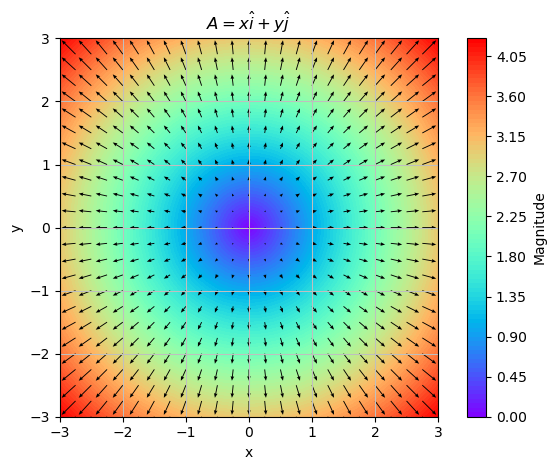



We now look at the Coulomb field


<lambdifygenerated-63>:2: RuntimeWarning: invalid value encountered in power
<lambdifygenerated-65>:2: RuntimeWarning: invalid value encountered in power


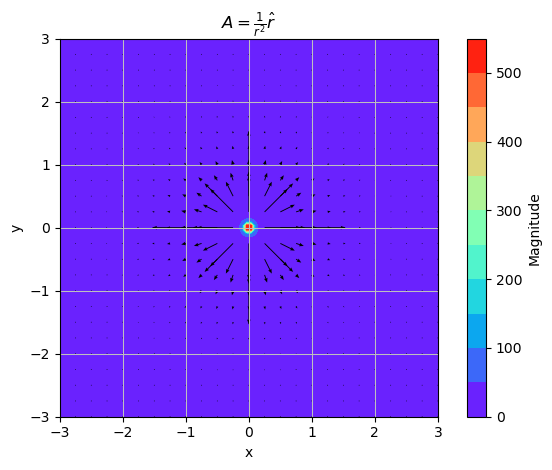

There are understandable problems here. In particular, no one likes a singularity
To void the singular behavior, we plot the field in a different region


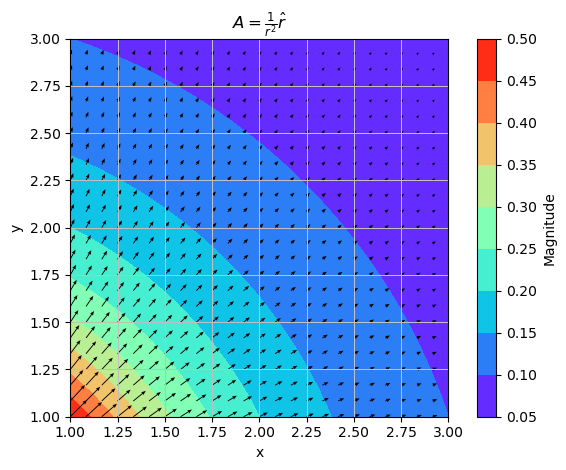

In [7]:
#From now on we will use the vector module of sympy to simplify our computations
from sympy.vector import CoordSys3D
from spb.plot_functions import plot_vector


R = CoordSys3D('R')

#We begin by visualizing some simple vector fields
print("")
print("")
print("Our first field is A=x i + y j")
A_x=R.x
A_y=R.y
A = A_x * R.i + A_y * R.j


plot_vector(A, (R.x, -3, 3), (R.y, -3, 3), adaptive=False,
quiver_kw=dict(color="black", scale=75, headwidth=4),
contour_kw={"cmap": "rainbow", "levels": 100},
grid=True, xlabel="x", ylabel="y", title="$A = x \\hat{i} + y \\hat{j}$")

#We now look at the Coulomb field
print("")
print("")
print("We now look at the Coulomb field")
A_x=R.x/(R.x**2 + R.y**2)**1.5
A_y=R.y/(R.x**2 + R.y**2)**1.5
A = A_x * R.i + A_y * R.j

plot_vector(A, (R.x, -3, 3), (R.y, -3, 3), adaptive=False,
quiver_kw=dict(color="black", scale=75, headwidth=4),
contour_kw={"cmap": "rainbow", "levels": 10}, 
grid=True, xlabel="x", ylabel="y", title="$A = \\frac{1}{r^2}\\hat{r}$")

print("There are understandable problems here. In particular, no one likes a singularity")
print("To void the singular behavior, we plot the field in a different region")

A_x=R.x/(R.x**2 + R.y**2)**1.5
A_y=R.y/(R.x**2 + R.y**2)**1.5
A = A_x * R.i + A_y * R.j

plot_vector(A, (R.x, 1, 3), (R.y, 1, 3), adaptive=False,
quiver_kw=dict(color="black", scale=8, headwidth=4),
contour_kw={"cmap": "rainbow", "levels": 10}, 
grid=True, xlabel="x", ylabel="y", title="$A = \\frac{1}{r^2}\\hat{r}$")



We now look at fields that have a rotational profile
If this were water velocity, we would just call this a vortex
The B field due to a long current carrying conductor is like this, except it falls off as 1/r


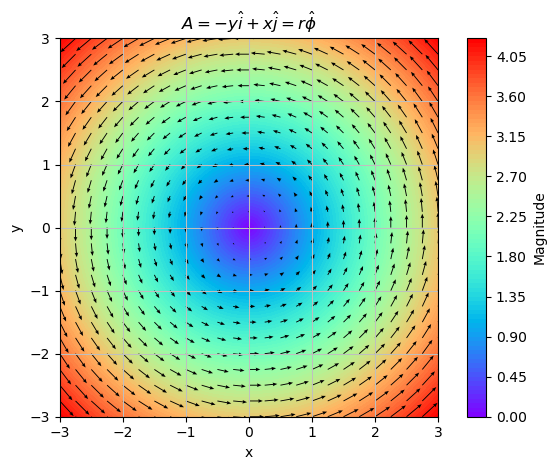



Here is another example


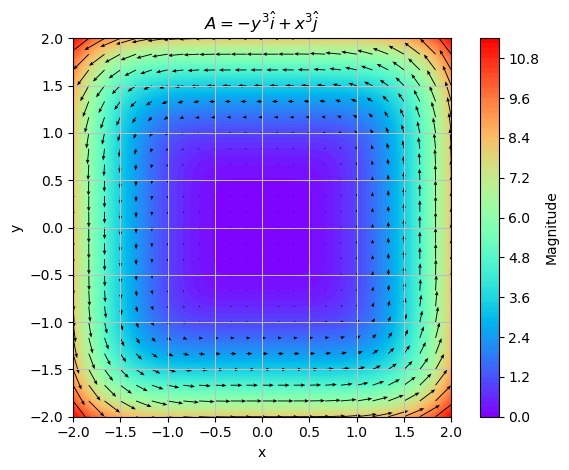



And another one


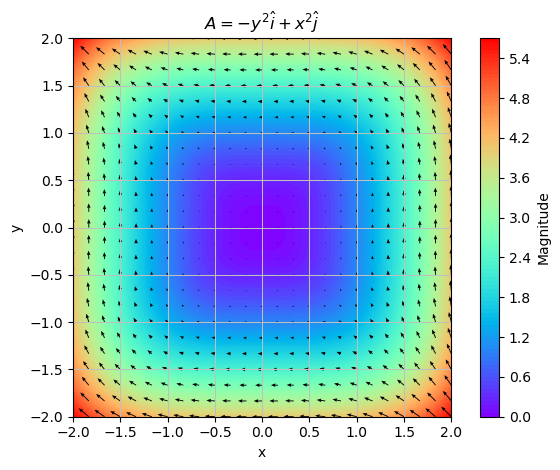

In [6]:
print("We now look at fields that have a rotational profile")
print("If this were water velocity, we would just call this a vortex")
print("The B field due to a long current carrying conductor is like this, except it falls off as 1/r")

A_x=-R.y
A_y=R.x
A = A_x * R.i + A_y * R.j

plot_vector(A, (R.x, -3, 3), (R.y, -3, 3), adaptive=False,
quiver_kw=dict(color="black", scale=75, headwidth=4),
contour_kw={"cmap": "rainbow", "levels": 100},
grid=True, xlabel="x", ylabel="y", title="$A = -y \\hat{i} + x \\hat{j}=r \\hat{\\phi}$")

print("")
print("")
print("Here is another example")
A_x=-R.y**3
A_y=R.x**3
A = A_x * R.i + A_y * R.j

plot_vector(A, (R.x, -2, 2), (R.y, -2, 2), adaptive=False,
quiver_kw=dict(color="black", scale=150, headwidth=4),
contour_kw={"cmap": "rainbow", "levels": 100},
grid=True, xlabel="x", ylabel="y", title="$A = -y^3 \\hat{i} + x^3 \\hat{j}$")

print("")
print("")
print("And another one")
A_x=-R.y**2
A_y=R.x**2
A = A_x * R.i + A_y * R.j

plot_vector(A, (R.x, -2, 2), (R.y, -2, 2), adaptive=False,
quiver_kw=dict(color="black", scale=150, headwidth=4),
contour_kw={"cmap": "rainbow", "levels": 100},
grid=True, xlabel="x", ylabel="y", title="$A = -y^2 \\hat{i} + x^2 \\hat{j}$")
